In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("C:\\Users\\UserName\\Desktop\\인공지능 개론\\데이터 셋\\baseball_players.csv")
df

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


In [86]:
df.shape

(1034, 6)

In [87]:
df.isna().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    1
Age               0
dtype: int64

In [88]:
df = df.dropna()

In [89]:
df.isna().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    0
Age               0
dtype: int64

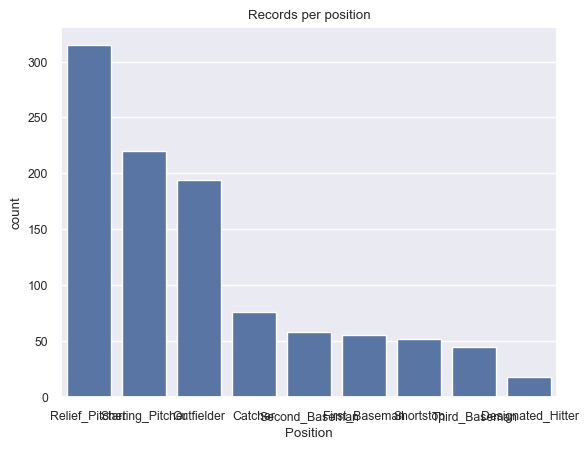

In [90]:
sns.countplot(x = "Position", data = df, palette = [sns.color_palette()[0]],

              order = df.Position.value_counts().index)

plt.title("Records per position");



In [91]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Position']=le.fit_transform(df['Position'])

df.head()

C:\Users\UserName\AppData\Local\Temp\ipykernel_24524\1704715669.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position']=le.fit_transform(df['Position'])


,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,0,74,180.0,22.99
1,Paul_Bako,BAL,0,74,215.0,34.69
2,Ramon_Hernandez,BAL,0,72,210.0,30.78
3,Kevin_Millar,BAL,2,72,210.0,35.43
4,Chris_Gomez,BAL,2,73,188.0,35.71


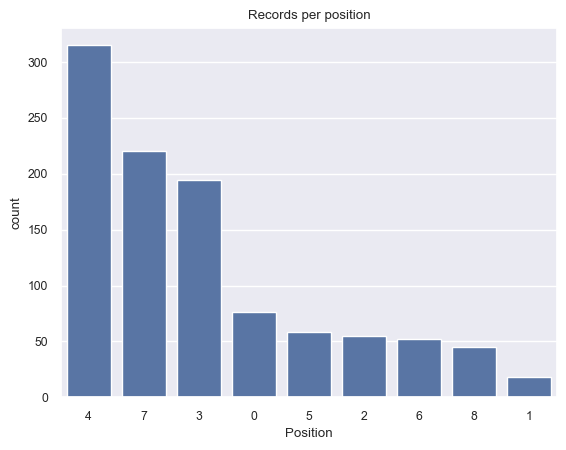

In [92]:
sns.countplot(x = "Position", data = df, palette = [sns.color_palette()[0]],

              order = df.Position.value_counts().index)

plt.title("Records per position");

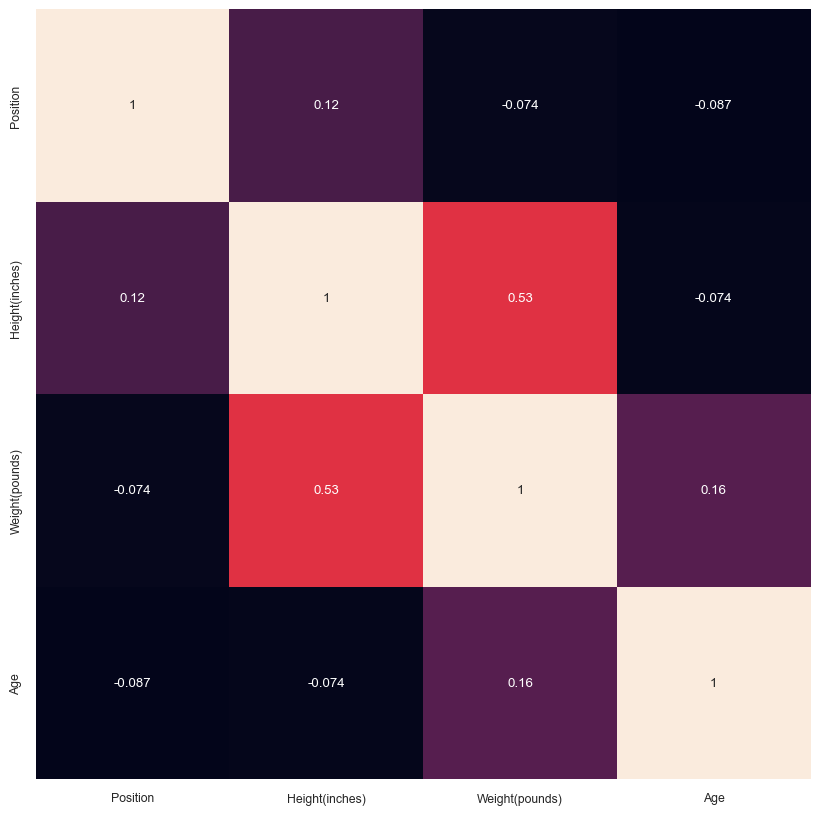

In [93]:
df_corr = df.corr()
#히트맵, 차원을 줄이기 위해서 숫자가 큰 column 4개만 넣어보자!
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [94]:
df.columns

Index(['Name', 'Team', 'Position', 'Height(inches)', 'Weight(pounds)', 'Age'], dtype='object')

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

x_data=df.loc[:, ['Height(inches)', 'Weight(pounds)']]
y_data=df.loc[:, 'Position']
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(826, 2) (826,)
(207, 2) (207,)


In [109]:
print(X_train.head())
# print(y_train.head())
# print(X_test.head())
# print(y_test.head())

     Height(inches)  Weight(pounds)
807              72           205.0
130              73           180.0
405              73           180.0
554              77           220.0
883              73           180.0


In [98]:
print(y_train.head())

807    3
130    4
405    7
554    4
883    7
Name: Position, dtype: int32


In [99]:
print(X_test.head())

     Height(inches)  Weight(pounds)
739              74           220.0
710              74           219.0
416              77           210.0
763              75           200.0
917              75           215.0


In [100]:
print(y_test.head())

739    3
710    7
416    4
763    2
917    7
Name: Position, dtype: int32


In [115]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [111]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값

회귀계수(기울기): [ 0.4 -0.3]
상수항(절편): 4.3


In [116]:
y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(826, 2) (207, 2)


In [117]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 3.947, RMSE: 1.987
Variance score : 0.067


In [119]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))

절편 값: -6.8460991943115586
회귀계수: [ 0.2 -0. ]


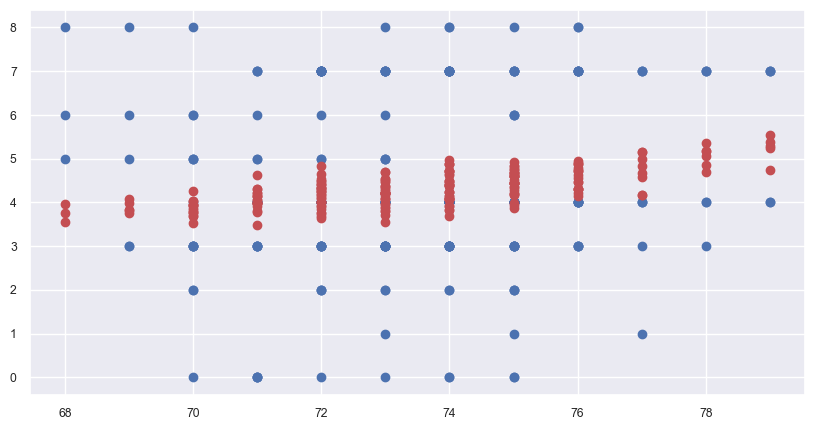

In [120]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Height(inches)'], y_test, label='y_test')
plt.scatter(X_test['Height(inches)'], y_preds, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()   


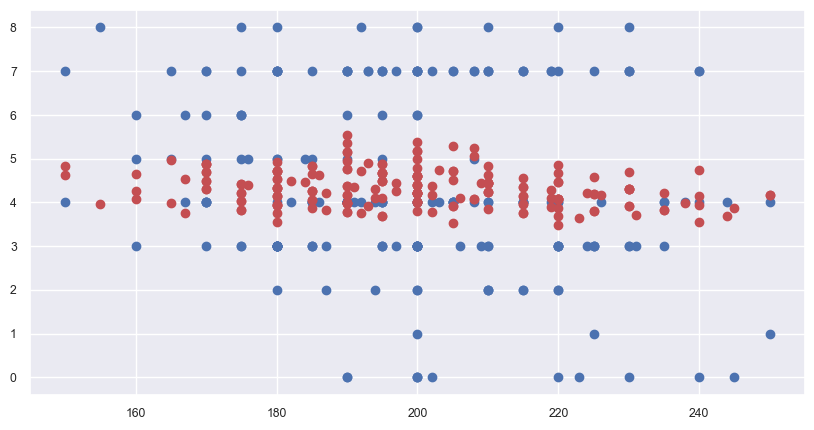

In [121]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Weight(pounds)'], y_test, label='y_test')
plt.scatter(X_test['Weight(pounds)'], y_preds, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()   

In [122]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.9867576882897446


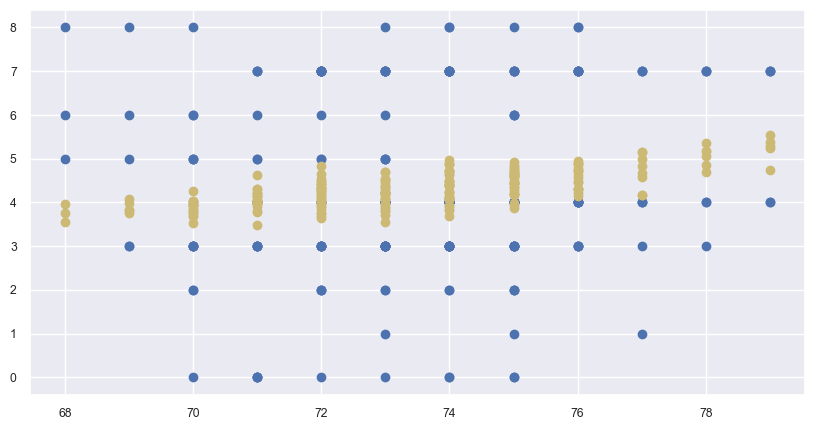

In [128]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Height(inches)'], y_test, label='y_test')
plt.scatter(X_test['Height(inches)'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()   

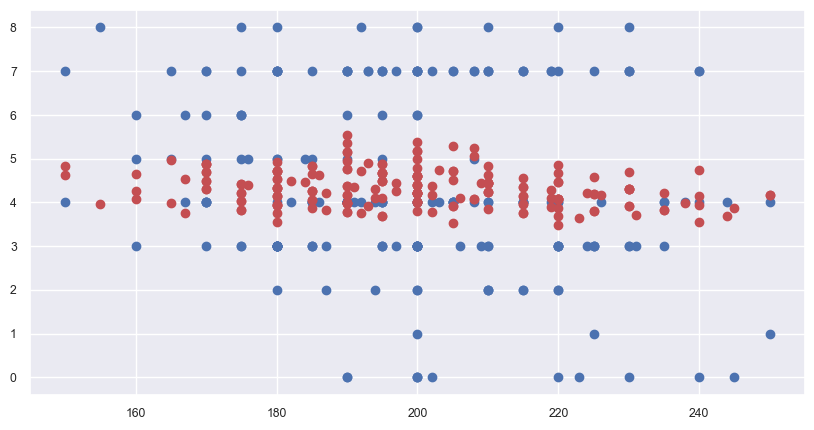

In [125]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Weight(pounds)'], y_test, label='y_test')
plt.scatter(X_test['Weight(pounds)'], y_preds, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()   

In [126]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.390560901277518


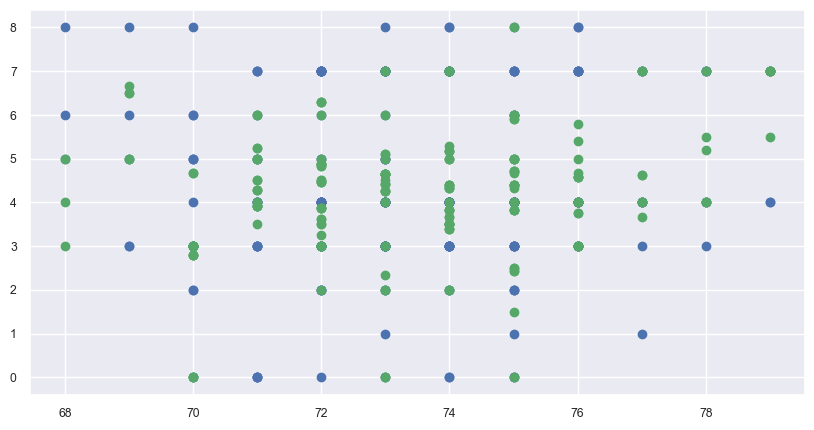

In [129]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Height(inches)'], y_test, label='y_test')
plt.scatter(X_test['Height(inches)'], dy_preds, c='g', label='dy_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()     

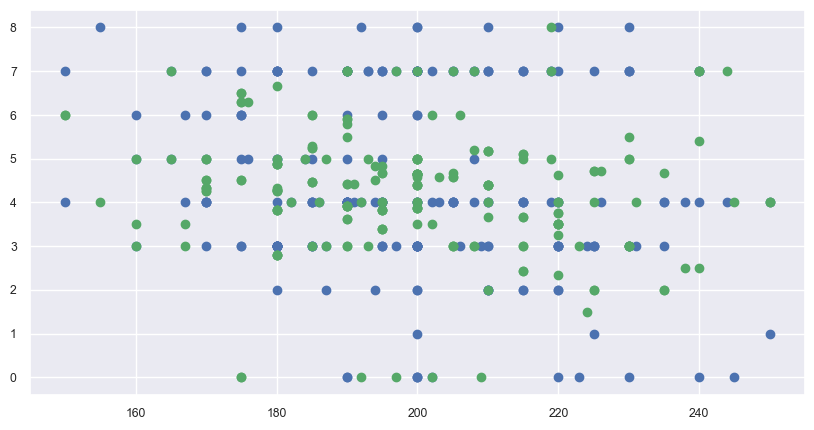

In [130]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Weight(pounds)'], y_test, label='y_test')
plt.scatter(X_test['Weight(pounds)'], dy_preds, c='g', label='dy_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()  

In [131]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.185731526648585


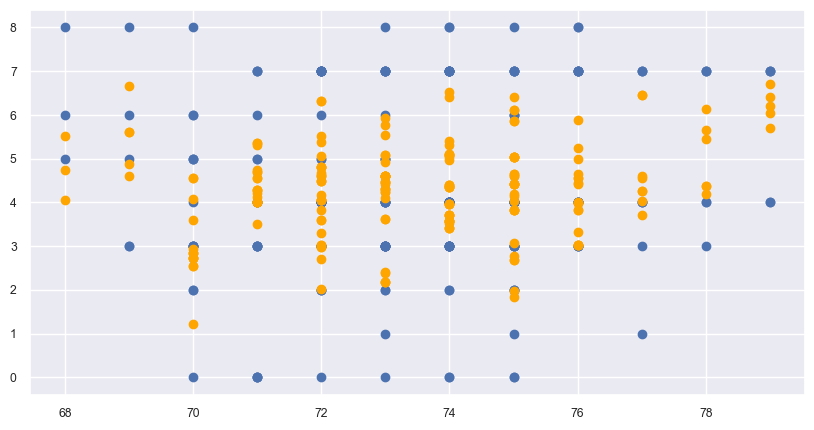

In [132]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Height(inches)'], y_test, label='y_test')
plt.scatter(X_test['Height(inches)'], ry_preds, c='orange', label='ry_preds')

plt.show()  

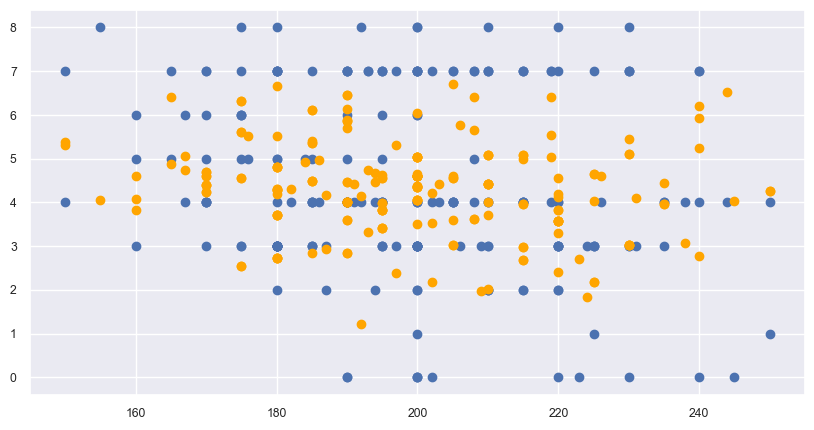

In [133]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Weight(pounds)'], y_test, label='y_test')
plt.scatter(X_test['Weight(pounds)'], ry_preds, c='orange', label='ry_preds')

plt.show()  

In [134]:
from sklearn import svm

model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

sy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.1951998825280747


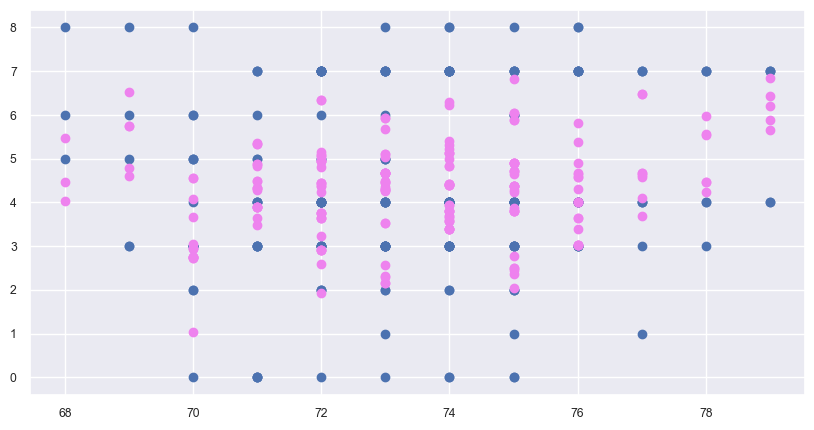

In [136]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Height(inches)'], y_test, label='y_test')
plt.scatter(X_test['Height(inches)'], sy_preds, c='violet', label='sy_preds')

plt.show()

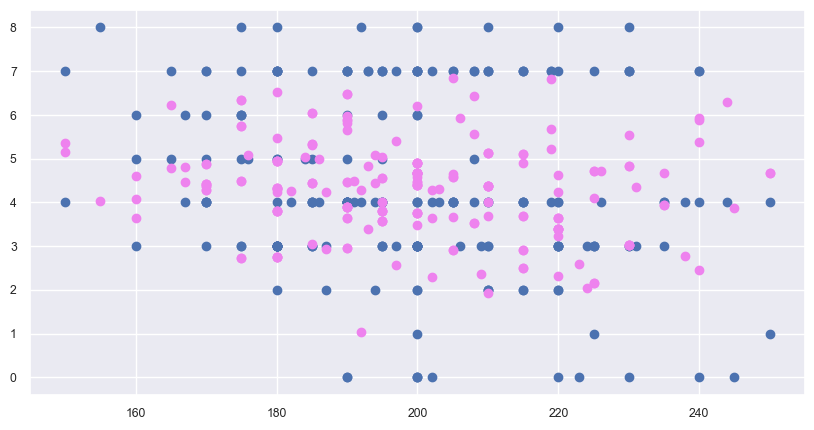

In [137]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Weight(pounds)'], y_test, label='y_test')
plt.scatter(X_test['Weight(pounds)'], sy_preds, c='violet', label='sy_preds')

plt.show()

In [138]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

0.31113801452784506


c:\new\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [139]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.089772657121847
